### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

### Load the data

In [2]:
X_full = pd.read_csv('Datasets/Housing Pricing Competition/train.csv', index_col='Id')
X_test_full = pd.read_csv('Datasets/Housing Pricing Competition/test.csv', index_col='Id')
X_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
X_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [4]:
col_with_Missing_values1 = [col for col in X_full.columns if X_full[col].isnull().any()]
len(col_with_Missing_values1)

19

In [5]:
col_with_Missing_values = [col for col in X_test_full.columns if X_test_full[col].isnull().any()]
len(col_with_Missing_values)

33

#### Remove rows with missing target, separate target from predictors

In [6]:
X_full.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = X_full.SalePrice
X = X_full.drop(['SalePrice'], axis=1)

### Divide data into training and validation subsets

In [7]:
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

### Cardinality
`Cardinality` means the number of unique values in a column

In [8]:
[(cname,' -->',X_train_full[cname].nunique()) for cname in X_train_full.columns if X_train_full[cname].dtype == "object"]

[('MSZoning', ' -->', 5),
 ('Street', ' -->', 2),
 ('Alley', ' -->', 2),
 ('LotShape', ' -->', 4),
 ('LandContour', ' -->', 4),
 ('Utilities', ' -->', 2),
 ('LotConfig', ' -->', 5),
 ('LandSlope', ' -->', 3),
 ('Neighborhood', ' -->', 25),
 ('Condition1', ' -->', 9),
 ('Condition2', ' -->', 6),
 ('BldgType', ' -->', 5),
 ('HouseStyle', ' -->', 8),
 ('RoofStyle', ' -->', 6),
 ('RoofMatl', ' -->', 7),
 ('Exterior1st', ' -->', 15),
 ('Exterior2nd', ' -->', 16),
 ('MasVnrType', ' -->', 4),
 ('ExterQual', ' -->', 4),
 ('ExterCond', ' -->', 5),
 ('Foundation', ' -->', 6),
 ('BsmtQual', ' -->', 4),
 ('BsmtCond', ' -->', 4),
 ('BsmtExposure', ' -->', 4),
 ('BsmtFinType1', ' -->', 6),
 ('BsmtFinType2', ' -->', 6),
 ('Heating', ' -->', 6),
 ('HeatingQC', ' -->', 5),
 ('CentralAir', ' -->', 2),
 ('Electrical', ' -->', 5),
 ('KitchenQual', ' -->', 4),
 ('Functional', ' -->', 6),
 ('FireplaceQu', ' -->', 5),
 ('GarageType', ' -->', 6),
 ('GarageFinish', ' -->', 3),
 ('GarageQual', ' -->', 5),
 ('Ga

#### Select categorical columns with relatively low cardinality (i.e less than 10)

In [9]:
categorical_cols = [cname for cname in X_train_full.columns 
                    if X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

#### Select numerical columns

In [10]:
numerical_cols = [cname for cname in X_train_full.columns 
                  if X_train_full[cname].dtype in ['int64', 'float64']]

#### Keep selected columns only

In [11]:
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [12]:
X_train.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Condition1,Condition2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
619,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Norm,Norm,...,774,0,108,0,0,260,0,0,7,2007
871,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,PosN,Norm,...,308,0,0,0,0,0,0,0,8,2009
93,RL,Pave,Grvl,IR1,HLS,AllPub,Inside,Gtl,Norm,Norm,...,432,0,0,44,0,0,0,0,8,2009
818,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Norm,Norm,...,857,150,59,0,0,0,0,0,7,2008
303,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Norm,Norm,...,843,468,81,0,0,0,0,0,1,2006


### Step 1: Define Preprocessing Steps¶
`ColumnTransformer` class to bundle together different preprocessing steps. :

* imputes missing values in numerical data, and
* imputes missing values and applies a one-hot encoding to categorical data.

In [13]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

In [14]:
# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

### Step 2: Define the Model

In [15]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=800, random_state=0)

### Create the final pipeline

In [16]:
my_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

#### Train the model

In [17]:
my_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  SimpleImputer(strategy='constant'),
                                                  ['MSSubClass', 'LotFrontage',
                                                   'LotArea', 'OverallQual',
                                                   'OverallCond', 'YearBuilt',
                                                   'YearRemodAdd', 'MasVnrArea',
                                                   'BsmtFinSF1', 'BsmtFinSF2',
                                                   'BsmtUnfSF', 'TotalBsmtSF',
                                                   '1stFlrSF', '2ndFlrSF',
                                                   'LowQualFinSF', 'GrLivArea',
                                                   'BsmtFullBath',
                                                   'BsmtHalfBath', 'FullBa...
                                                   'Condition1', 'Condition2',
                                                   'BldgType', 'HouseStyle',
                                                   'RoofStyle', 'RoofMatl',
                                                   'MasVnrType', 'ExterQual',
                                                   'ExterCond', 'Foundation',
                                                   'BsmtQual', 'BsmtCond',
                                                   'BsmtExposure',
                                                   'BsmtFinType1',
                                                   'BsmtFinType2', 'Heating',
                                                   'HeatingQC', 'CentralAir',
                                                   'Electrical', 'KitchenQual',
                                                   'Functional', 'FireplaceQu', ...])])),
                ('model',
                 RandomForestRegressor(n_estimators=800, random_state=0))])

### Evaluation

In [21]:
# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = mean_absolute_error(y_valid, preds)
print('MAE:', score)

MAE: 17261.60330479452


## Cross-Validation

In [19]:
from sklearn.model_selection import cross_val_score

def get_score(n_estimators, X, y, cv):
    
    my_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=cv,
                              scoring='neg_mean_absolute_error')
    # Replace this body with your own code
    return scores.mean()

In [20]:
get_score(800, X, y, 5)

17615.933449486303

In [22]:
results = {}
for i in range(10,20):
    
    results[i*50] = get_score(i*50, X, y, 5)
    print(i*50,'-->',results[i*50])

500 --> 17603.638716438356
550 --> 17614.811688667494
600 --> 17597.779474885843
650 --> 17594.711085353003
700 --> 17603.436713307245
750 --> 17610.591873059362
800 --> 17615.933449486303
850 --> 17609.869396454473
900 --> 17606.85756925419
950 --> 17606.419570295606


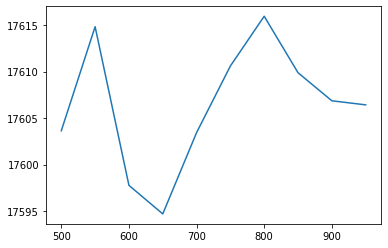

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

### Predict the Test value and save 

In [18]:
preds_test = my_pipeline.predict(X_test)

In [19]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)